# Lab #10 - LR Time Constants (March 18th)

**Student name:** Liam Murray \
**Student number:** 87357539 \
**Partner:** Alexis Bushfield

## Section 1: Familiarize
In this stage we get familiar with the equipment, the analysis procedure, and to get a clear big-picture view of the experiment. This will help the rest of the experiment go more smoothly and you will be able to make informed decisions.

### Experimental Goal 🎯:
>Obtain a comparison between a high-precision determination of the inductance (L) of an inductor from measurements of the time constant (τ)  of  LR circuits, and L measured directly using an inductance meter.

### Familiarize: Question
This is the start of your big-picture investigation. Some questions to ask ourselves are: 
- What is the goal of the experiment?
- What do we need to show to answer the question?
- What’s the final quantity or model that we need to achieve? 

$$\tau = \frac{L}{R}$$
$$V(t)=V(0)e^{-t/\tau}$$

### Familiarize: Discover
Here we get familiar with what we actually need to do. Map out how to get from what we can do with our equipment to the goal. Figure out where the uncertainties come from so we can reduce them as much as possible. In this process we will develop a brief measurement strategy to start our investigation. Some questions to ask ourselves are: 
- How does the equipment work? 
- What equations are related to the experimental goal? 
- Can we write our experimental goal in terms of variables that we can measure? 
- Which variables do we control? 
- What are our sources of uncertainty? 
- How do we assign a number of these sources of uncertainty? (quantify by asking what PDF is attributed to that uncertainty)

Often drawing a diagram of the equipment can be useful in figuring out what’s important and how it relates to the calculations we need to do in order to attain our experiment goal. 

### Measurement Plan
- Using oscilloscope connected to circuit, record Single SEQ readings.
- Record Resistance (R), (X1,Y1), (X2,Y2) coordinate pairs, and their uncertainties as outlined below:
    - All resistances have a standard uncertainty of 1%.
    - The X values will have a rectangular PDF as it's most likely to be affected by the computer system rounding its recorded times ($u[x] = \frac{0.5}{\sqrt{3}}$).
    - The Y values will have a Gaussian PDF to account for human error, during which we will measure the top and bottom of the line to determine our 95% Confidence Interval.
- Record measurements in increments of 200 ohms starting from 100 ohms.

## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [163]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Change the name of the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [164]:
#Identifying and reading the data
datafile = "Tau.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an excel formula to every value in a column.

In [165]:
#Making Vectors from the data
# x_var = data[:, 0]  # Make a vector of all elements (:) in the first column (0)
# y_var = data[:, 1]  # Make a vector of all elements in the second column
# y_uncertainty = data[:, 2]  # Make a vector of all elements in the third column

R = data[:,0]
dR = data[:,1]
X1=data[:,2]*10**(-6)
upperY1 = data[:,4]
lowerY1 = data[:,5]
Y1 = (upperY1-lowerY1)/2 + lowerY1
dY1 = (upperY1-lowerY1)/4
X2 = data[:,7]*10**(-6)
upperY2 = data[:,9]
lowerY2 = data[:,10]
Y2 = (upperY2-lowerY2)/2 + lowerY2
dY2 = (upperY2-lowerY2)/4
dX = 0.28867513

tau = (-1*np.log(Y2/Y1)/(X2-X1))**(-1)
def dtau(Y1, Y2, X1, X2, sigma_Y1, sigma_Y2, sigma_X1, sigma_X2):
    ln_ratio = np.log(Y2 / Y1)
    term_X1 = (sigma_X1 / ln_ratio) ** 2
    term_X2 = (sigma_X2 / ln_ratio) ** 2
    term_Y1 = ((X2 - X1) / (ln_ratio ** 2 * Y1) * sigma_Y1) ** 2
    term_Y2 = ((X2 - X1) / (ln_ratio ** 2 * Y2) * sigma_Y2) ** 2
    
    return np.sqrt(term_X1 + term_X2 + term_Y1 + term_Y2)

L = tau*R
dL = L*np.sqrt((dtau(Y1, Y2, X1, X2, dY1,dY2,28867513,28867513))**2)
print(tau)
print(dL)

# print(tau[0],L[0])
x_var = np.concatenate((X1, X2),axis=None)
y_var = np.concatenate((Y1, Y2),axis=None)
y_uncertainty = np.concatenate((np.abs(upperY1 - lowerY1)/4,np.abs(upperY2-lowerY2)/4), axis=None) #np.sqrt(((upperY1-lowerY1)/4)**2 + ((upperY2-lowerY2)/4)**2)
print(y_uncertainty)


[3.77132406e-05 3.49436262e-05 4.72617461e-05 2.61005961e-05]
[22349.76308945 25330.00157027 53389.52127386 16283.10988914]
[0.005  0.2308 0.0008 0.01   0.0004 0.0006 0.0005 0.0008]


## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [166]:
#Preparing the Plots
x_label = "Time (s)"
y_label = "Voltage (V)"
title = "Time vs Voltage in Circuit"
xmin = 0
xmax = np.max(x_var)*1.1#np.max(X2-X1)
ymin = 0
ymax = np.max(y_var)*1.1

Now lets make a graph of y_var vs. x_var, with error bars on the y data.

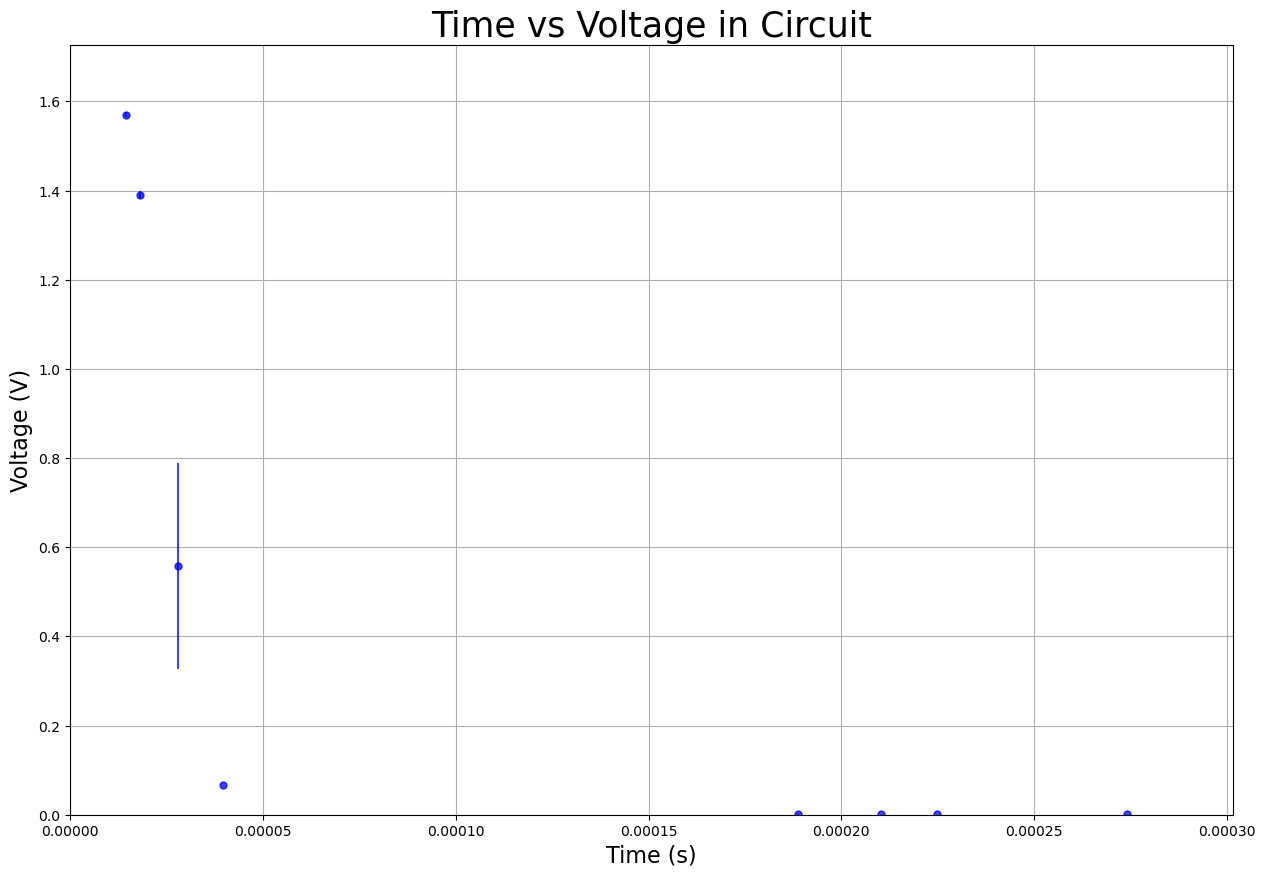

In [167]:
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot", bbox_inches="tight", dpi=300)  # Saves the figure

## Iterative Fitting:

This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [168]:
def FitFunction(x, a, b,c):
    y = a * np.exp(-b*x)/c
    # y = a/((x + b)**2) + c
    return y

n_parameters = 3

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [169]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf,-np.inf, -np.inf],[np.inf,np.inf, np.inf])  
initial_param=(1000,1,1)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [170]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [ ]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 1.664262e+03 ± 2.9e+09
Parameter #2: 1.237965e+05 ± 4.6e+02
Parameter #3: 1.729421e+02 ± 3.0e+08


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [172]:
# First calculate a reasonable range of x values for our line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create our array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

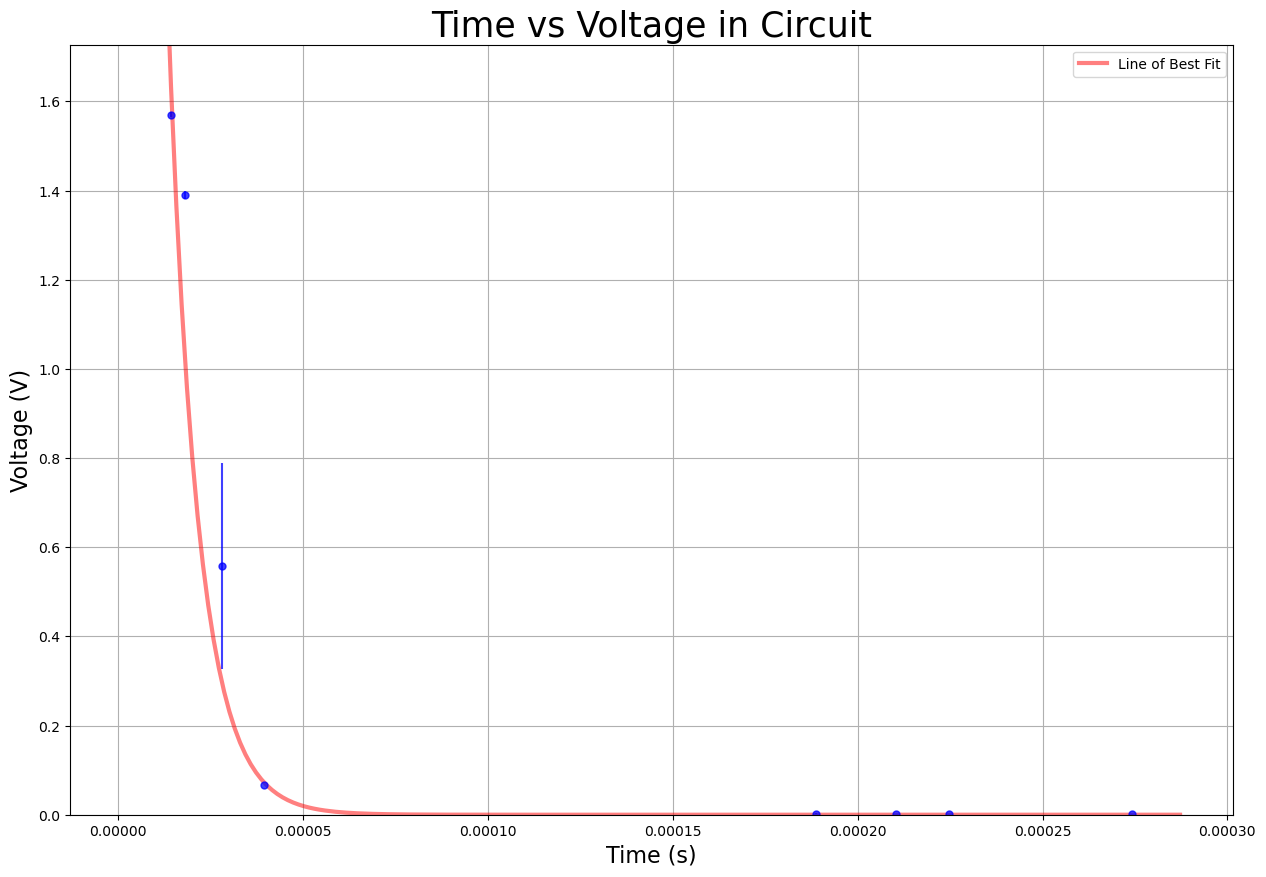

In [173]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [ ]:
residual = y_var - FitFunction(x_var,*optimized_parameters)

Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

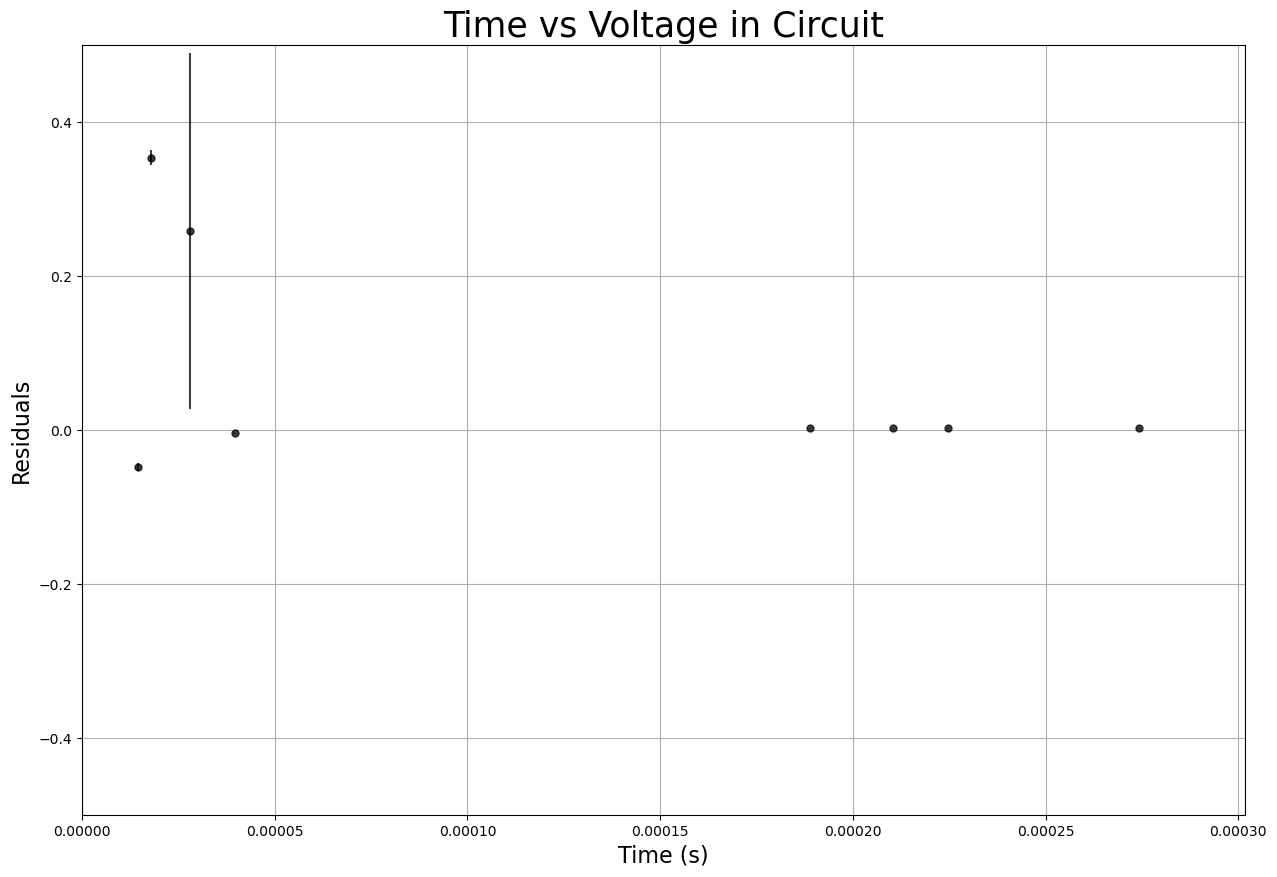

In [175]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Set the axis limits for the residuals plot
ymin_r=-0.5
ymax_r=0.5
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [177]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

# t-score for comparing fitted and direct inductance
L_fitted = 0.0052
L_direct = L 
d_L_fitted = 1.07e-5
d_L_direct = dL

# Compute t-score
tprime = (np.abs(L_fitted - L_direct)) / (np.sqrt((d_L_fitted)**2 + (d_L_direct)**2))

# Print result
print("T' =", tprime)


print(np.mean(tprime))

Chisq 356.4510
T' = [6.39235386e-08 6.73366471e-08 8.87487620e-09 1.59056864e-07]
7.479798138915464e-08


## Summary
Through our first round of data collection, we faced some setbacks with analyzing our data. We were successful in analytically determining a value for $\tau$. Our numerical/statistical methods of analyzing our results are inconclusive, as our $\chi^2$ from our model is 256.35, and our $T'$ is several magnitudes of 10 below 1, which means that there is not statistical significance in the similarities of our values.

Recorded value with Multimeter: $5.06\cdot10^3$ \
Best calculated value for L: $4.73\cdot10^3$
T' = 7.479798138915464e-08 (Mean)

When analyzing these two numbers from a human perspective, I am confident in saying they are "close enough" and thus were successfully

Plan for improvement:
1. Perform data collection using a refined method that would account for the accuracy and feasibility of algebraic manipulation.
2. Take more data across range to reinforce trends in the data, which will help inform our choice of model and approach to assessing the value of $L$.

### Comparison with Aaliyah and Mia
Aaliyah and Mia faced similar difficulties, as their data was also inconclusive. Their measurement plan was similar to our, and their analysis returned the following values:

Inductance:
- 0.00462 $\pm$ 0.00046 $H$ when using a resistance of 500 $\Omega$
- 0.00325 $\pm$ 0.00045 $H$ when using a resistance of 700 $\Omega$
- 0.00462 $\pm$ 0.00035 $H$ when using a resistance of 900 $\Omega$ \
T' = 2.43 which positively reflects on their model.
Experimentally determined: 0.00495

### Experimental Summary
Overall we were semi-successful in attaining the experimental goal to "Obtain a comparison between a high-precision determination of the inductance (L) of an inductor from measurements of the time constant (τ)  of  LR circuits, and L measured directly using an inductance meter." There is still great room for improvement.